#### Stage_2_task_2.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load the data
data = pd.read_csv('mcgc.tsv', sep='\t')

In [4]:
data.head()

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [8]:
# Define a function to fit the growth curve and determine carrying capacity
def fit_growth_curve(time, od600):
    """
    Fits a logistic growth model to the OD600 vs Time data.
    Returns the time to reach carrying capacity (K).
    """
    def logistic(t, K, r, A):
        return K / (1 + np.exp(-r * (t - A)))

    # Fit the logistic curve
    popt, _ = curve_fit(logistic, time, od600, maxfev=10000, p0=[max(od600), 0.1, 100])
    K, r, A = popt
    
    # Calculate the time to reach carrying capacity (95% of K)
    time_to_capacity = A + np.log(19) / r  # Solve for t when y = 0.95 * K
    return time_to_capacity

In [9]:
# Extract strains and their knock-out/knock-in states
strains = ['A', 'B', 'C']
states = ['-', '+']

In [10]:
# Plot growth curves and calculate time to carrying capacity
time_to_capacity_ko = []
time_to_capacity_ki = []

plt.figure(figsize=(15, 10))

for strain in strains:
    for state in states:
        col = f"{strain}{state}"
        if col not in data.columns:
            continue
        # Extract data for the specific strain and state
        time = data['time'].values
        od600 = data[col].values
        
        # Plot the growth curve
        plt.plot(time, od600, label=f'{col}')
        
        # Fit the growth curve and calculate time to carrying capacity
        time_to_capacity = fit_growth_curve(time, od600)
        
        # Store the time to carrying capacity based on state
        if state == '-':
            time_to_capacity_ko.append(time_to_capacity)
        elif state == '+':
            time_to_capacity_ki.append(time_to_capacity)

<Figure size 1500x1000 with 0 Axes>

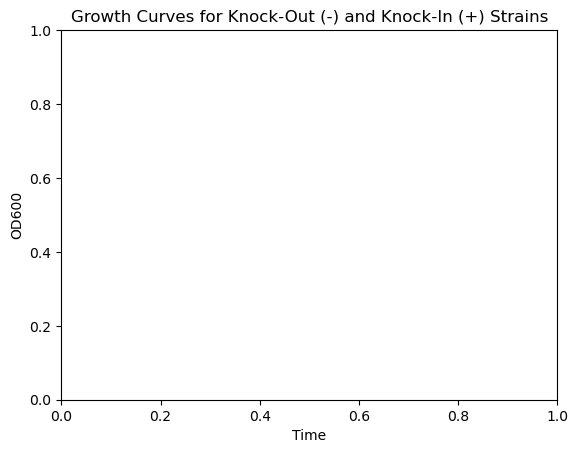

In [12]:
# Add legend and labels to the plot
plt.title("Growth Curves for Knock-Out (-) and Knock-In (+) Strains")
plt.xlabel("Time")
plt.ylabel("OD600")
#plt.legend()
plt.show()

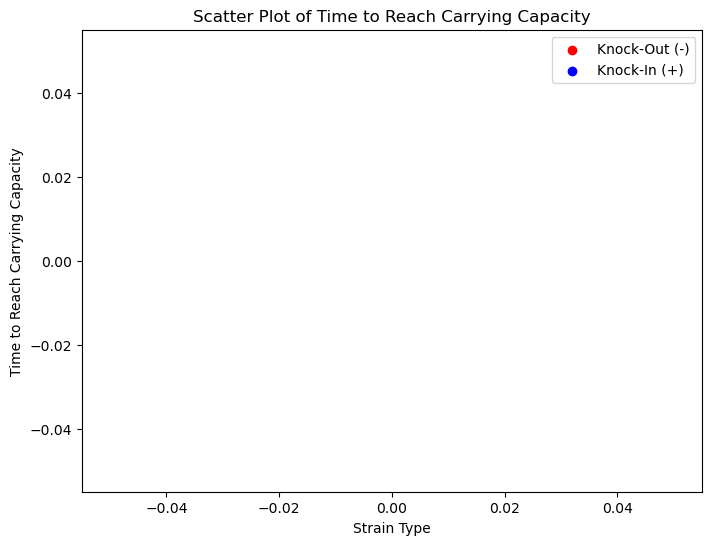

In [13]:
# Generate scatter plot of time to reach carrying capacity
plt.figure(figsize=(8, 6))
plt.scatter(['Knock-Out'] * len(time_to_capacity_ko), time_to_capacity_ko, label='Knock-Out (-)', color='red')
plt.scatter(['Knock-In'] * len(time_to_capacity_ki), time_to_capacity_ki, label='Knock-In (+)', color='blue')
plt.title("Scatter Plot of Time to Reach Carrying Capacity")
plt.xlabel("Strain Type")
plt.ylabel("Time to Reach Carrying Capacity")
plt.legend()
plt.show()

/tmp/ipykernel_19349/3812291014.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_boxplot, labels=['Knock-Out (-)', 'Knock-In (+)'])


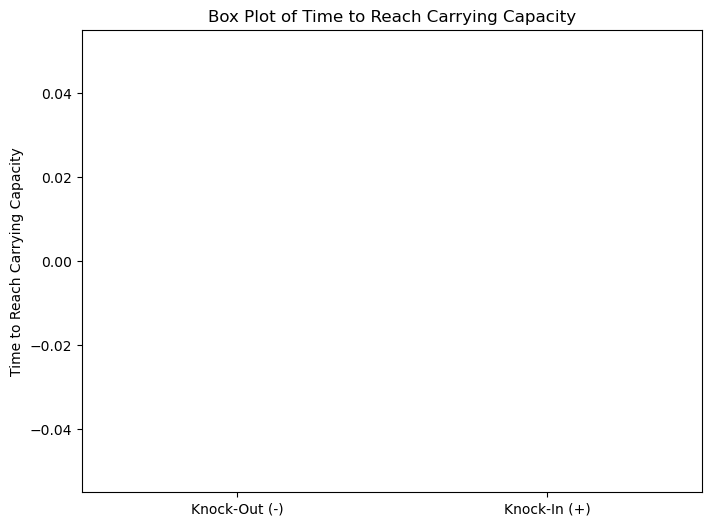

In [14]:
# Generate box plot of time to reach carrying capacity
plt.figure(figsize=(8, 6))
data_boxplot = [time_to_capacity_ko, time_to_capacity_ki]
plt.boxplot(data_boxplot, labels=['Knock-Out (-)', 'Knock-In (+)'])
plt.title("Box Plot of Time to Reach Carrying Capacity")
plt.ylabel("Time to Reach Carrying Capacity")
plt.show()

In [15]:
# Statistical test to check for differences
from scipy.stats import ttest_ind

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(time_to_capacity_ko, time_to_capacity_ki)

/home/betin/anaconda3/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [16]:
# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Comments on observations
if p_value < 0.05:
    print("There is a statistically significant difference in the time it takes for knock-out and knock-in strains to reach their carrying capacity.")
else:
    print("There is no statistically significant difference in the time it takes for knock-out and knock-in strains to reach their carrying capacity.")

# Additional observations
# If the knock-out strains take longer to reach carrying capacity, this may indicate that the gene deletion slows growth.
# If the knock-in strains reach carrying capacity faster, this suggests the gene enhances growth or metabolic efficiency.

T-statistic: nan, P-value: nan
There is no statistically significant difference in the time it takes for knock-out and knock-in strains to reach their carrying capacity.
